In [167]:
import pandas as pd
import glob
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
#plt.style.use('seaborn-colorblind')
#plt.style.use('seaborn-pastel')

In [168]:
# https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
# https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
# https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/

In [400]:
df = pd.read_csv('REE_data_processed.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67199 entries, 0 to 67198
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   year           67199 non-null  int64         
 1   month          67199 non-null  int64         
 2   day            67199 non-null  int64         
 3   hour           67199 non-null  int64         
 4   season         67199 non-null  int64         
 5   coef_a         67199 non-null  float64       
 6   coef_b         67199 non-null  float64       
 7   coef_c         67199 non-null  float64       
 8   coef_d         67199 non-null  float64       
 9   timestamp      67199 non-null  datetime64[ns]
 10  date           67199 non-null  object        
 11  coef_a_smooth  67199 non-null  float64       
 12  coef_b_smooth  67199 non-null  float64       
 13  coef_c_smooth  67199 non-null  float64       
 14  coef_d_smooth  67199 non-null  float64       
 15  coef_a_norm    6719

In [402]:
y = df['coef_a_smooth'].values
t = df['timestamp'].values

## Simple Exponential Smoothing (SES)

The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps.

The method is suitable for univariate time series without trend and seasonal components.

Exponential smoothing is a time series forecasting method for __univariate data__ that can be extended to support data with a systematic __trend or seasonal component__.

It is a powerful forecasting method that may be used as an __alternative to__ the popular Box-Jenkins __ARIMA family of methods__.

Time series methods like the Box-Jenkins ARIMA family of methods develop a model where the prediction is a weighted linear sum of recent past observations or lags.

ES forecasting methods are similar in that a prediction is a weighted sum of past observations, but the model explicitly uses an exponentially decreasing weight for past observations. Specifically, past observations are weighted with a geometrically decreasing ratio.

Forecasts produced using ES methods are weighted averages of past observations, with the weights decaying exponentially as the observations get older. In other words, the more recent the observation the higher the associated weight.

ES methods may be considered as peers and an alternative to the popular Box-Jenkins ARIMA class of methods for time series forecasting.

Collectively, the methods are sometimes referred to as ETS models, referring to the explicit modeling of Error, Trend and Seasonality.

Types of Exponential Smoothing:

A simple method that assumes no systematic structure, an extension that explicitly handles trends, and the most advanced approach that add support for seasonality.

### Single Exponential Smoothing

Single Exponential Smoothing, SES for short, also called Simple Exponential Smoothing, is a time series forecasting method for __univariate data without a trend or seasonality__.

It requires a single parameter, $\alpha$, also called the __smoothing factor__ or smoothing coefficient.

This parameter controls the rate at which the influence of the observations at prior time steps decay exponentially. Alpha is often set to a value between 0 and 1. Large values mean that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction.

A value close to 1 indicates fast learning (that is, only the most recent values influence the forecasts), whereas a value close to 0 indicates slow learning (past observations have a large influence on forecasts).

__Hyperparameters__:

* Alpha: Smoothing factor for the level.


### Double Exponential Smoothing

Double Exponential Smoothing (DES) is an extension to Exponential Smoothing that explicitly adds support for __trends in the univariate time series__.

In addition to the $\alpha$ parameter for controlling smoothing factor for the level, an additional __smoothing trend factor__ is added to control the decay of the influence of the change in trend called $\beta$.

The method supports trends that change in different ways: an additive and a multiplicative, depending on whether the trend is linear or exponential respectively.

Double Exponential Smoothing with an additive trend is classically referred to as __Holt’s linear trend model__, named for the developer of the method Charles Holt.

#### Additive Trend: Double Exponential Smoothing with a linear trend

Multiplicative Trend: Double Exponential Smoothing with an exponential trend.
For longer range (multi-step) forecasts, the trend may continue on unrealistically. As such, it can be useful to dampen the trend over time.

Dampening means reducing the size of the trend over future time steps down to a straight line (no trend).

The forecasts generated by Holt’s linear method display a constant trend (increasing or decreasing) indecently into the future. Even more extreme are the forecasts generated by the exponential trend method […] Motivated by this observation […] introduced a parameter that “dampens” the trend to a flat line some time in the future.


As with modeling the trend itself, we can use the same principles in dampening the trend, specifically additively or multiplicatively for a linear or exponential dampening effect. A damping coefficient Phi (p) is used to control the rate of dampening.

#### Additive Dampening: Dampen a trend linearly. Multiplicative Dampening: Dampen the trend exponentially.

__Hyperparameters__

* Alpha: Smoothing factor for the level.
* Beta: Smoothing factor for the trend.
* Trend Type: Additive or multiplicative.
* Dampen Type: Additive or multiplicative.
* Phi: Damping coefficient.
* Triple Exponential Smoothing

### Triple Exponential Smoothing (TES)

Is an extension of Exponential Smoothing that explicitly adds __support for seasonality__ to the univariate time series.

This method is sometimes called __Holt-Winters Exponential Smoothing__, named for two contributors to the method: Charles Holt and Peter Winters.

In addition to the $\alpha$ and $\beta$ smoothing factors, a new parameter is added  $\gamma$ that controls the influence on the seasonal component.

As with the trend, the seasonality may be modeled as either an additive or multiplicative process for a linear or exponential change in the seasonality.

Additive Seasonality: Triple Exponential Smoothing with a linear seasonality.
Multiplicative Seasonality: Triple Exponential Smoothing with an exponential seasonality.
Triple exponential smoothing is the most advanced variation of exponential smoothing and through configuration, it can also develop double and single exponential smoothing models.

Being an adaptive method, Holt-Winter’s exponential smoothing allows the level, trend and seasonality patterns to change over time.


Additionally, to ensure that the seasonality is modeled correctly, the number of time steps in a seasonal period (Period) must be specified. For example, if the series was monthly data and the seasonal period repeated each year, then the Period=12.

__Hyperparameters__

* Alpha: Smoothing factor for the level.
* Beta: Smoothing factor for the trend.
* Gamma: Smoothing factor for the seasonality.
* Trend Type: Additive or multiplicative.
* Dampen Type: Additive or multiplicative.
* Phi: Damping coefficient.
* Seasonality Type: Additive or multiplicative.
* Period: Time steps in seasonal period.

### How to Configure Exponential Smoothing

All of the model hyperparameters can be specified explicitly.

This can be challenging for experts and beginners alike.

Instead, it is common to use numerical optimization to search for and fund the smoothing coefficients (alpha, beta, gamma, and phi) for the model that result in the lowest error.

A more robust and objective way to obtain values for the unknown parameters included in any exponential smoothing method is to estimate them from the observed data. The unknown parameters and the initial values for any exponential smoothing method can be estimated by minimizing the sum of the squared errors.


The parameters that specify the type of change in the trend and seasonality, such as weather they are additive or multiplicative and whether they should be dampened, must be specified explicitly.

### Fit Single Exponential Smoothing

Single Exponential Smoothing or simple smoothing can be implemented in Python via the SimpleExpSmoothing Statsmodels class.

First, an instance of the SimpleExpSmoothing class must be instantiated and passed the training data. The fit() function is then called providing the fit configuration, specifically the alpha value called smoothing_level. If this is not provided or set to None, the model will automatically optimize the value.

This fit() function returns an instance of the HoltWintersResults class that contains the learned coefficients. The forecast() or the predict() function on the result object can be called to make a forecast.



In [379]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random

# fit model
model = SimpleExpSmoothing(y)
model_fit = model.fit()

print(model_fit.params)
print(model_fit.sse)
print(model_fit.aic)
print(model_fit.aicc)
print(model_fit.bic)
# print(model_fit.level)
print(model_fit.params_formatted)

# make prediction
horizon = 24
#yhat = model_fit.predict(len(y)-horizon, len(y)) # in sample
yhat = model_fit.forecast(horizon) # out of sample

{'smoothing_level': 1.0, 'smoothing_slope': nan, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 14.19977730969697, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
87593.00740158574
17814.611393214145
17814.611988505392
17832.84222050504
                  name      param  optimized
smoothing_level  alpha   1.000000       True
initial_level      l.0  14.199777       True


In [380]:
t_new = pd.date_range(start = t.max(), periods=horizon, freq='H')
T = np.concatenate((t, t_new))
Y = np.concatenate((y, yhat))
df_new = pd.DataFrame({'T':T, 'Y':Y})

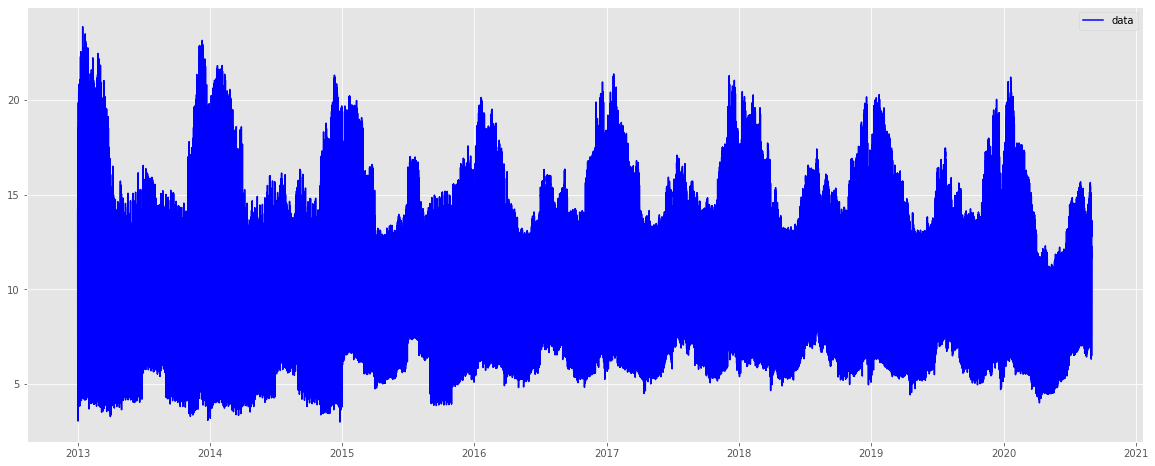

In [381]:
plt.figure(figsize=(20,8))
y0 = df_new['Y'].values
t0 = df_new['T'].values
plt.plot(t0, y0, color='blue', label='data')
plt.legend()
plt.show()

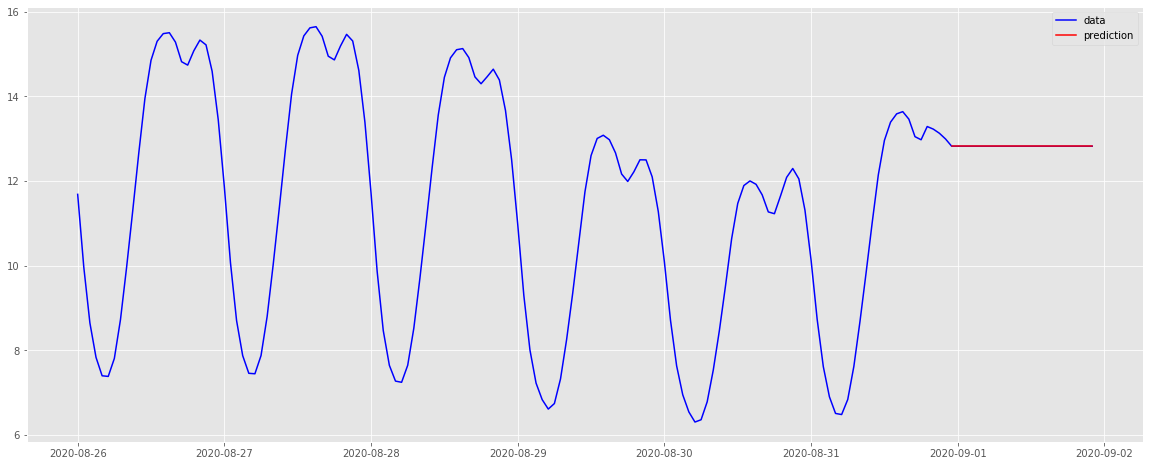

In [356]:
plt.figure(figsize=(20,8))
y0 = df_new[-horizon*7:]['Y'].values
t0 = df_new[-horizon*7:]['T'].values
plt.plot(t0, y0, color='blue', label='data')
y1 = df_new[-horizon:]['Y'].values
t1 = df_new[-horizon:]['T'].values
plt.plot(t1, y1, color='red', label='prediction')
plt.legend()
plt.show()

## Double and Triple Exponential Smoothing

Single, Double and Triple Exponential Smoothing can be implemented in Python using the ExponentialSmoothing Statsmodels class.

First, an instance of the ExponentialSmoothing class must be instantiated, specifying both the training data and some configuration for the model.

Specifically, you must specify the following configuration parameters:

* trend: The type of trend component, as either “add” for additive or “mul” for multiplicative. Modeling the trend can be disabled by setting it to None.
* damped: Whether or not the trend component should be damped, either True or False.
* seasonal: The type of seasonal component, as either “add” for additive or “mul” for multiplicative. Modeling the seasonal component can be disabled by setting it to None.
* seasonal_periods: The number of time steps in a seasonal period, e.g. 12 for 12 months in a yearly seasonal structure (more here).
The model can then be fit on the training data by calling the fit() function.

This function allows you to either specify the smoothing coefficients of the exponential smoothing model or have them optimized. By default, they are optimized (e.g. optimized=True). These coefficients include:

* smoothing_level ($\alpha$): the smoothing coefficient for the level.
* smoothing_slope ($\beta$): the smoothing coefficient for the trend.
* smoothing_seasonal ($\gamma$): the smoothing coefficient for the seasonal component.
* damping_slope ($\phi$): the coefficient for the damped trend.
Additionally, the fit function can perform basic data preparation prior to modeling; specifically:

use_boxcox: Whether or not to perform a power transform of the series (True/False) or specify the lambda for the transform.

The fit() function will return an instance of the HoltWintersResults class that contains the learned coefficients. The forecast() or the predict() function on the result object can be called to make a forecast.

In [393]:
# double or triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# prepare data

# create class
model = ExponentialSmoothing(y, trend='add', seasonal='add', seasonal_periods=24)
# fit model
model_fit = model.fit()

print(model_fit.params)
print(model_fit.sse)
print(model_fit.aic)
print(model_fit.aicc)
print(model_fit.bic)
# print(model_fit.level)
print(model_fit.params_formatted)

# make prediction
#yhat = model_fit.predict(...)

# make forecast
horizon = 48
yhat = model_fit.forecast(horizon)
print('Forecast')
print(yhat)

/Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


{'smoothing_level': 0.7410736776293554, 'smoothing_slope': 0.000605109161969915, 'smoothing_seasonal': 0.2589253545201023, 'damping_slope': nan, 'initial_level': 10.819081463483819, 'initial_slope': 0.1343321203763561, 'initial_seasons': array([ 1.51766479, -2.14788032, -4.59010978, -5.82250297, -5.84090966,
       -5.01679468, -3.7846526 , -2.39459025, -1.0504499 ,  0.29362314,
        1.71884048,  3.11020523,  4.58227218,  5.70914038,  6.21255208,
        6.52532273,  6.7069235 ,  7.02485372,  8.05779778,  9.73957913,
       10.9939353 , 10.87136651,  9.1132853 ,  6.00762287]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
11101.64026657379
-120940.2008531621
-120940.17316140412
-120684.96927108955
                     name      param  optimized
smoothing_level     alpha   0.741074       True
smoothing_slope      beta   0.000605       True
smoothing_seasonal  gamma   0.258925       True
initial_level         l.0  10.819081       True
initial_slope         b.0   0.134332  

In [394]:
t_new = pd.date_range(start = t.max(), periods=horizon, freq='H')
T = np.concatenate((t, t_new))
Y = np.concatenate((y, yhat))
df_new = pd.DataFrame({'T':T, 'Y':Y})

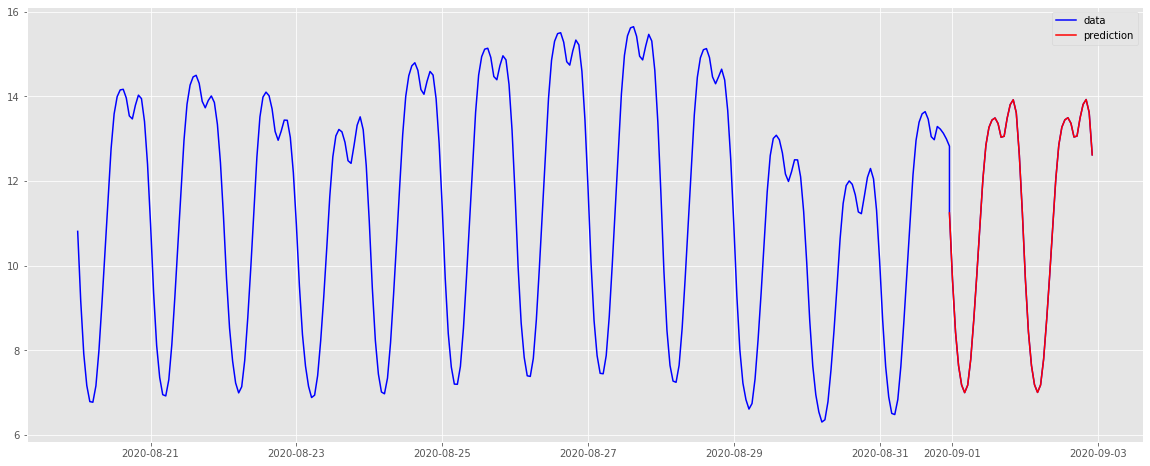

In [395]:
plt.figure(figsize=(20,8))
y0 = df_new[-horizon*7:]['Y'].values
t0 = df_new[-horizon*7:]['T'].values
plt.plot(t0, y0, color='blue', label='data')
y1 = df_new[-horizon:]['Y'].values
t1 = df_new[-horizon:]['T'].values
plt.plot(t1, y1, color='red', label='prediction')
plt.legend()
plt.show()

## 1) Autoregression (AR)

The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.

The method is suitable for univariate time series without trend and seasonal components.

    * p : AR order, number of autoregressive terms
    * past values have an effect on current values
    * based on linear regression with past values
    * the order of the AR model correspond to the number of observations concorporated 
    
\begin{equation}
y_t^{AR,p} = \beta_1 y_{t-1} + \beta_2 y_{t-2} + \ldots + \beta_p y_{t-p} 
\end{equation}

\begin{equation}
\alpha_k : model \hspace{0.1cm} parameter \hspace{0.1cm} \forall k \in (1, p) \\
\end{equation}

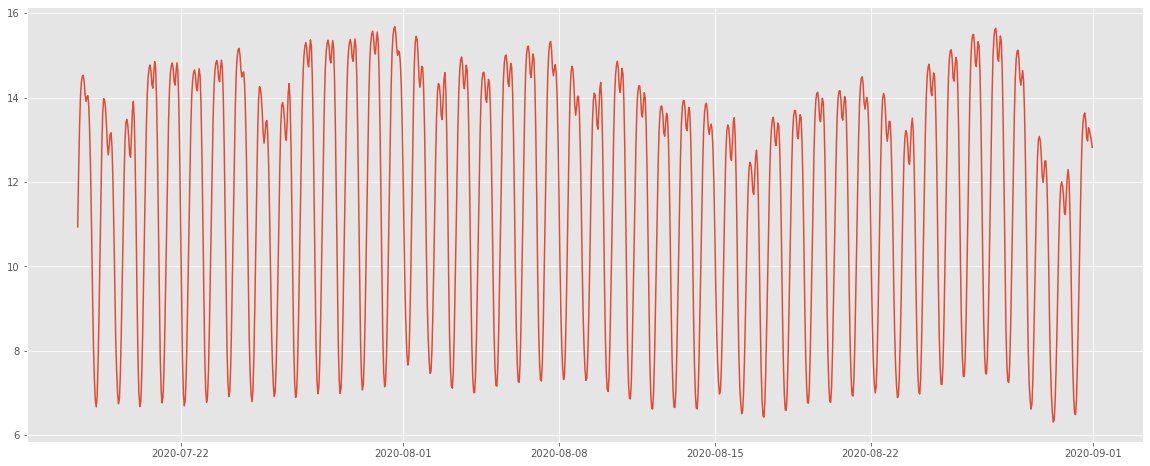

In [304]:
y = df['coef_a_smooth'].values
t = df['timestamp'].values

# plot last trhee years
plt.figure(figsize=(20,8))
plt.plot(t[-365*3:], y[-365*3:])
plt.show()

[0.00012744 0.00012673 0.00012605 0.0001254  0.00012478 0.0001242
 0.00012364 0.00012312 0.00012261 0.00012214 0.00012169 0.00012126
 0.00012085 0.00012046 0.00012009 0.00011974 0.00011941 0.00011909
 0.00011879 0.00011851 0.00011824 0.00011798 0.00011773 0.0001175
 0.00011728]
AIC: -22.786, HQIC: -22.786, BIC: -22.786


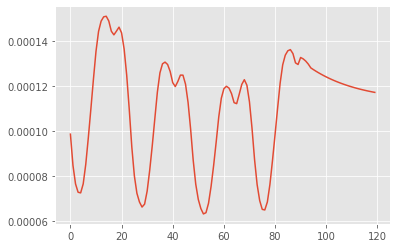

In [16]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.api as sm
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AutoReg.html

# fit model

model = AutoReg(df['coef_a_smooth'].values, lags=1).fit()
#model = AutoReg(df['coef_a_smooth'].values, lags=1, seasonal=True, period=365).fit()

# make predictions

start = len(y)
end = start + 24
yhat = model.predict(start, end)
print(yhat)
out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'
print(out.format(model.aic, model.hqic, model.bic))

Y = np.concatenate((y, yhat))
plt.plot(Y[-(24*5):])
plt.show()

## 2) Moving Average (MA)

The moving average (MA) method models the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps.

A moving average model is different from calculating the moving average of the time series.

The notation for the model involves specifying the order of the model q as a parameter to the MA function, e.g. MA(q). For example, MA(1) is a first-order moving average model.

The method is suitable for univariate time series without trend and seasonal components.
Python Code

We can use the ARMA class to create an MA model and setting a zeroth-order AR model. We must specify the order of the MA model in the order argument.


    * q : MA order, number of moving average terms
    * use the dependency between an observation and a residual error from a moving average applied to lagged observations
    * the order of the AR model correspond to the number of observations concorporated 
    
\begin{equation}
y_t^{MA,p} = \epsilon_t + \alpha_1 \epsilon_{t-1} + \alpha_2 \epsilon_{t-2} + \ldots + \alpha_q \epsilon_{t-q}
\end{equation}

\begin{equation}
\alpha_k : model \hspace{0.1cm} parameter \hspace{0.1cm} \forall k \in (1, q) \\
\epsilon_k = y^{SMA}_k - y_k : white \hspace{0.1cm} noise \hspace{0.1cm} error \hspace{0.1cm} terms \hspace{0.1cm} \forall k \in (t, t-q)\\
y^{SMA}_k = \frac{\sum_{s=1}^{s=k}y_s}{k}
\end{equation}

[0.00011995 0.00011309 0.00011309 0.00011309 0.00011309 0.00011309
 0.00011309 0.00011309 0.00011309 0.00011309 0.00011309 0.00011309
 0.00011309 0.00011309 0.00011309 0.00011309 0.00011309 0.00011309
 0.00011309 0.00011309 0.00011309 0.00011309 0.00011309 0.00011309
 0.00011309]


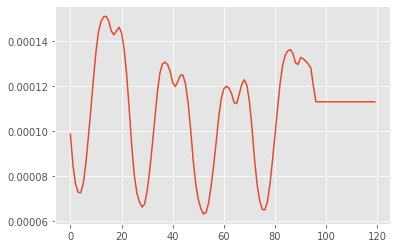

In [17]:
from statsmodels.tsa.arima_model import ARMA

# contrived dataset

# fit model
model = ARMA(y, order=(0, 1))
model_fit = model.fit(disp=False)


# make prediction
yhat = model_fit.predict(start, end )
print(yhat)

Y = np.concatenate((y, yhat))
plt.plot(Y[-(24*5):])
plt.show()

## 3) Autoregressive Moving Average (ARMA)

The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function of the observations and resiudal errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models.

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to an ARMA function, e.g. ARMA(p, q). An ARIMA model can be used to develop AR or MA models.

The method is suitable for univariate time series without trend and seasonal components.

$$
y_t^{ARMA} = y_t^{AR}  + y_t^{MA}
$$

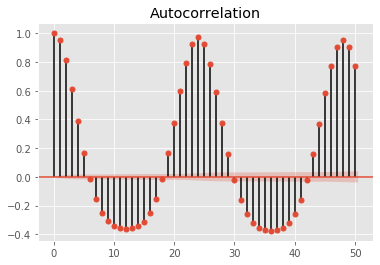

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y, lags=50)
plt.show()

/Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


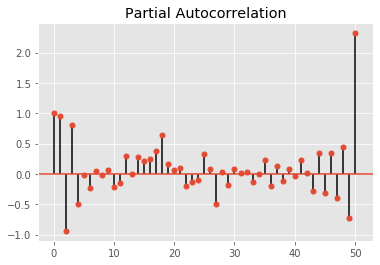

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(y, lags=50)
plt.show()

/Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[1.25114531e-04 1.20351152e-04 1.15052637e-04 1.09777902e-04
 1.05190211e-04 1.01847367e-04 1.00008182e-04 9.96298509e-05
 1.00441316e-04 1.02044691e-04 1.04038378e-04 1.06116091e-04
 1.08107961e-04 1.09966750e-04 1.11717919e-04 1.13397683e-04
 1.15003869e-04 1.16475821e-04 1.17705802e-04 1.18572720e-04
 1.18982734e-04 1.18901139e-04 1.18365132e-04 1.17475052e-04
 1.16369205e-04 1.15191962e-04 1.14065516e-04 1.13072789e-04
 1.12254216e-04 1.11616236e-04 1.11146072e-04 1.10826501e-04
 1.10645668e-04 1.10599749e-04 1.10689262e-04 1.10911945e-04
 1.11255873e-04 1.11695804e-04 1.12194145e-04 1.12706069e-04
 1.13186939e-04 1.13599590e-04 1.13919405e-04 1.14136043e-04
 1.14251893e-04 1.14278283e-04 1.14230947e-04 1.14126163e-04
 1.13978455e-04]


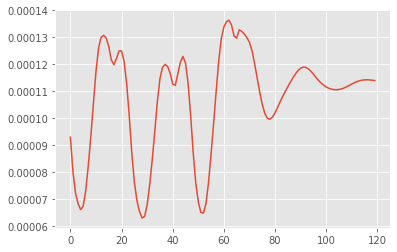

In [20]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random

# fit model
p = 1 # AR order, use two observations in the autoregressive part
q = 1 # MA order, use one observation for the moving average
model = ARMA(y, order=(p, q))
model_fit = model.fit(disp=False)
# make prediction

start = len(y)
horizon = 24
end = start + horizon

yhat = model_fit.predict(start, end)
print(yhat)

Y = np.concatenate((y, yhat))
plt.plot(Y[-(24*5):])
plt.show()

## 4) Autoregressive Integrated Moving Average (ARIMA)

The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function, e.g. ARIMA(p, d, q). An ARIMA model can also be used to develop AR, MA, and ARMA models.

The method is suitable for univariate time series with trend and without seasonal components.

[-8.99499924e-07 -7.99197288e-07 -7.10137024e-07 -6.31059036e-07
 -5.60844465e-07 -4.98499860e-07 -4.43143120e-07 -3.93991014e-07
 -3.50348097e-07 -3.11596875e-07 -2.77189064e-07 -2.46637837e-07
 -2.19510929e-07 -1.95424527e-07 -1.74037837e-07 -1.55048265e-07
 -1.38187129e-07 -1.23215865e-07 -1.09922649e-07 -9.81193954e-08
 -8.76391042e-08 -7.83334913e-08 -7.00708934e-08 -6.27344049e-08
 -5.62202230e-08]


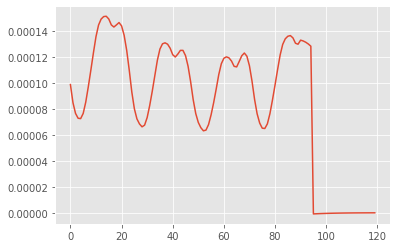

In [22]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
p = 1 # AR order
d = 2 # differential order
q = 1 # MA order
model = ARIMA(y, order=(1, 1, 1))
model_fit = model.fit(disp=False)

start = len(y)
horizon = 24
end = start + horizon

yhat = model_fit.predict(start, end)
print(yhat)

Y = np.concatenate((y, yhat))
plt.plot(Y[-(24*5):])
plt.show()


## 5) Seasonal Autoregressive Integrated Moving-Average (SARIMA)

The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.

It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level.

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. SARIMA(p, d, q)(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period). A SARIMA model can be used to develop AR, MA, ARMA and ARIMA models.

The method is suitable for univariate time series with trend and/or seasonal components.

In [ ]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
S = 2

y0 = y[-365*3:]
model = SARIMAX(y0, order=(1, 1, 1), seasonal_order=(1, 1, 1, 365))
model_fit = model.fit(disp=False)

start = len(y0)
horizon = 24
end = start + horizon

yhat = model_fit.predict(start, end)
print(yhat)

Y = np.concatenate((y0, yhat))
plt.plot(Y[-(24*5):])
plt.show()


/Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


## 6) Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

The Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) is an extension of the SARIMA model that also includes the modeling of exogenous variables.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series may be referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

The SARIMAX method can also be used to model the subsumed models with exogenous variables, such as ARX, MAX, ARMAX, and ARIMAX.

The method is suitable for univariate time series with trend and/or seasonal components and exogenous variables.

In [116]:
# Load seasonal data
#path = "/Volumes/HDD/data/weather_data/aemet/diarios/year/*.csv"
#all_files = glob.glob(path)
all_files = ["/Volumes/HDD/data/weather_data/aemet/diarios/year/2001.csv",
             "/Volumes/HDD/data/weather_data/aemet/diarios/year/2000.csv"]
cols = ['id', 'height', 'year', 'month', 'day', 'temp_max', 'temp_min',
        'temp_avg', 'wind', 'wind_dir', 'wind_speed', 'prec', 'irradiance',
        'max_pressure', 'min_pressure']

dt = pd.concat([pd.read_csv(f, sep=';', usecols=cols) for f in tqdm(all_files)])

100%|██████████| 2/2 [00:00<00:00,  5.90it/s]


In [117]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66678 entries, 0 to 33207
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            66678 non-null  object 
 1   height        66678 non-null  int64  
 2   year          66678 non-null  int64  
 3   month         66678 non-null  int64  
 4   day           66678 non-null  int64  
 5   temp_max      66552 non-null  float64
 6   temp_min      66552 non-null  float64
 7   temp_avg      66551 non-null  float64
 8   wind          63311 non-null  float64
 9   wind_dir      63311 non-null  float64
 10  wind_speed    64747 non-null  float64
 11  prec          66521 non-null  object 
 12  irradiance    61624 non-null  float64
 13  max_pressure  65030 non-null  float64
 14  min_pressure  65019 non-null  float64
dtypes: float64(9), int64(4), object(2)
memory usage: 8.1+ MB


In [118]:
print(dt.isna().sum())
dt.fillna(0, inplace=True)
dt['prec'] = dt['prec'].map({'Ip':0})
dt['prec'] = dt['prec'].apply(lambda x: float(x))

id                 0
height             0
year               0
month              0
day                0
temp_max         126
temp_min         126
temp_avg         127
wind            3367
wind_dir        3367
wind_speed      1931
prec             157
irradiance      5054
max_pressure    1648
min_pressure    1659
dtype: int64


In [119]:
dt.describe()

,height,year,month,day,temp_max,temp_min,temp_avg,wind,wind_dir,wind_speed,prec,irradiance,max_pressure,min_pressure
count,66678.000000,66678.000000,66678.000000,66678.000000,66678.000000,66678.000000,66678.000000,66678.000000,66678.000000,66678.000000,2744.0,66678.000000,66678.000000,66678.000000
mean,385.456162,2000.501965,6.520277,15.735355,20.770755,10.459124,15.614639,9.491880,19.161103,3.116484,0.0,6.724971,951.630368,947.396002
std,429.377948,0.500000,3.442879,8.803702,7.648566,6.728661,6.817121,4.507727,12.756543,2.215948,0.0,4.343060,158.696305,158.528529
min,2.000000,2000.000000,1.000000,1.000000,-6.500000,-24.000000,-13.700000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,35.000000,2000.000000,4.000000,8.000000,15.200000,5.800000,10.600000,6.700000,9.000000,1.700000,0.0,2.800000,941.900000,937.800000
50%,190.000000,2001.000000,7.000000,16.000000,20.600000,10.600000,15.800000,9.200000,21.000000,2.800000,0.0,7.500000,991.100000,986.100000
75%,656.000000,2001.000000,10.000000,23.000000,26.300000,15.700000,20.900000,11.900000,28.000000,4.200000,0.0,10.200000,1014.300000,1010.500000
max,2371.000000,2001.000000,12.000000,31.000000,43.800000,33.200000,36.200000,42.500000,99.000000,21.100000,0.0,15.000000,1039.000000,1036.000000


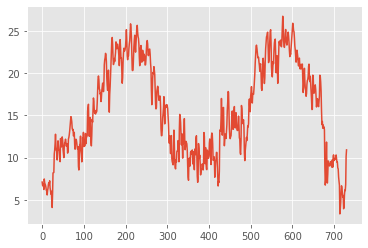

In [123]:
dt.sort_values(by=['height','year','month','day'], inplace=True)
dt.reset_index(drop=True, inplace=True)
cols = ['temp_max', 'temp_min','temp_avg', 'wind', 'wind_dir', 'wind_speed', 'prec', 'irradiance',
        'max_pressure', 'min_pressure']
dtg = dt.groupby(['year', 'month','day'])[cols].mean().reset_index()
dtg['date'] = dtg.apply(lambda row: convert_to_date(row), axis=1)
y_x = dtg['temp_avg']

dtg['temp_avg'].plot()
plt.show()

In [124]:
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
y0 = y[-len(y_x):] # slice the same lengh data of the endogenous variable
model = SARIMAX(y[-274:], exog=y_x, order=(1, 1, 1), seasonal_order=(0, 0, 0, 365))
model_fit = model.fit(disp=False)

start = len(y)
horizon = 24*5
end = start + horizon

yhat = model_fit.predict(1, horizon, exog=y_x)
# print(yhat)

Y = np.concatenate((y0, yhat))
plt.plot(Y[-(24*8):])
plt.show()

#plt.plot(y0[-(24*5):])
#plt.show()

NameError: name 'y' is not defined

## 7) Multivariate: Vector Autoregression (VAR)

The Vector Autoregression (VAR) method models the next step in each time series using an AR model. It is the generalization of AR to multiple parallel time series, e.g. multivariate time series.

The notation for the model involves specifying the order for the AR(p) model as parameters to a VAR function, e.g. VAR(p).

The method is suitable for multivariate time series without trend and seasonal components.

In [127]:
# VAR example
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random
import numpy as np
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = i + np.random.normal(24, 0.9) **2
    v2 = 2*i+ v1 + np.sqrt(np.random.normal(24, 2.5))
    row = [v1, v2]
    data.append(row)



/Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


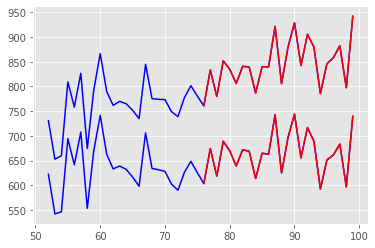

In [128]:
# fit model
df = pd.DataFrame(data=data, columns= ['v1', 'v2'])
Y = df.values # Y = [y1, y2, ..., yn] 
model = VAR(Y)
model_fit = model.fit()

# make prediction
Yhat = model_fit.forecast(model_fit.y, steps=24)
#print(yhat)
       
Y = np.concatenate((Y, Yhat))
df2 = pd.concat((df,pd.DataFrame(data=Yhat, columns= ['v1', 'v2'])), axis=0)
plt.plot(df[-(48):], color='blue')
plt.plot(df[-(24):], color='red')
plt.show()

## Vector Autoregression Moving-Average (VARMA)

The __Vector Autoregression Moving-Average (VARMA)__ method models the next step in each time series using an ARMA model. It is the generalization of ARMA to multiple parallel time series, e.g. multivariate time series.

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to a VARMA function, e.g. __VARMA(p, q)__. A VARMA model can also be used to develop VAR or VMA models.

The method is __suitable for multivariate time series WITHOUT trend and seasonal__ components.

In [165]:
# VARMA example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random

df = pd.DataFrame(data = data, columns= ['v1', 'v2'])
Y = df.values # Y = [y1, y2, ..., yn] 

# fit model
model = VARMAX(Y, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
Yhat = model_fit.forecast(steps=24)
#print(yhat)



Y = np.concatenate((Y, Yhat))
df2 = pd.concat((df, pd.DataFrame(data=Yhat, columns= ['v1', 'v2'])), axis=0)



/Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


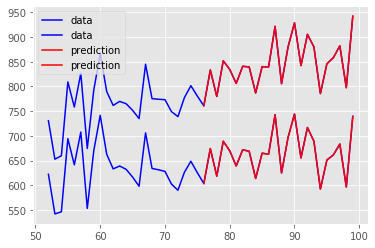

In [166]:

plt.plot(df[-(48):], color='blue', label='data')
plt.plot(df[-(24):], color='red', label='prediction')
plt.legend()
plt.show()



## Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)

The __Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)__ is an extension of the VARMA model that also includes the modeling of exogenous variables. It is a multivariate version of the ARMAX method.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series(es) are referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

The VARMAX method can also be used to model the __subsumed models with exogenous variables__, such as VARX and VMAX.

The method is __suitable for multivariate time series WITHOUT trend and seasonal components with exogenous variables__.

In [136]:
y_x

0       7.091111
1       6.697778
2       6.637778
3       6.834444
4       6.211111
         ...    
726     6.145055
727     6.083516
728     6.813333
729    10.148889
730    10.912222
Name: temp_avg, Length: 731, dtype: float64

In [138]:
y_x

0       7.091111
1       6.697778
2       6.637778
3       6.834444
4       6.211111
         ...    
726     6.145055
727     6.083516
728     6.813333
729    10.148889
730    10.912222
Name: temp_avg, Length: 731, dtype: float64

In [152]:
# VARMAX example
from statsmodels.tsa.statespace.varmax import VARMAX

# fit model
df = pd.DataFrame(data = data, columns= ['v1', 'v2'])
Y = df.values # Y = [y1, y2, ..., yn] 
model = VARMAX(Y, exog = y_x[-len(Y):], order = (1, 1))
model_fit = model.fit(disp=False)
# make prediction
data_exog2 = np.random.random(24)
Yhat2 = model_fit.forecast(exog=data_exog2, steps=24)
#print(yhat)

/Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


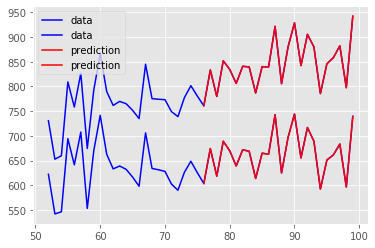

In [153]:
Y = np.concatenate((Y, Yhat2))
df2 = pd.concat((df,pd.DataFrame(data=Yhat, columns= ['v1', 'v2'])), axis=0)
plt.plot(df[-(48):], color='blue', label='data')
plt.plot(df[-(24):], color='red', label='prediction')
plt.legend()
plt.show()